# **Spit some [tensor] flow**

We need to learn the intricacies of tensorflow to master deep learning

`Let's get this over with`



In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


## The basic idea is that the CNNs learn things in a hierarchical manner

Thus, if we have a great classifier that can classify 10k objects with 99% accuracy, it must have great primary layers that learn the basic features perfectly. 

So we can use the primary layers for other things, like classifying 11k objects !


## Let's talk about some pretrained models

- VGG16, VGG19 having 16 and 19 layers respectively 

- ResNet is larger than VGG, with different branches that learn something different; ResNet50, ResNet151, are variations

- Inception has multiple convolutions in parallel branches, different sizes of filters are tried and then their results are appended 


## Rule of Thumb

Computations take time, we must work around them. As a rule of thumb, if you're using data augmentation, put CNN computations inside the training loop.


In [0]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
import sys, os


In [0]:
from tensorflow.keras.applications.vgg16 import VGG16 as pretrained, preprocess_input


## Let's import the dataset


In [3]:
!wget --passive-ftp --prefer-family=ipv4 https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-320.tgz

--2020-05-25 08:36:45--  https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-320.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.248.166
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.248.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341553947 (326M) [application/x-tar]
Saving to: ‘imagenette2-320.tgz’

imagenette2-320.tgz 100%[===================>] 325.73M  35.0MB/s    in 9.9s    

2020-05-25 08:36:55 (32.9 MB/s) - ‘imagenette2-320.tgz’ saved [341553947/341553947]



In [4]:
!ls

imagenette2-320.tgz  sample_data


In [5]:
!tar -xzvf imagenette2-320.tgz

Streaming output truncated to the last 5000 lines.
imagenette2-320/train/n02102040/n02102040_1343.JPEG
imagenette2-320/train/n02102040/n02102040_487.JPEG
imagenette2-320/train/n02102040/n02102040_2516.JPEG
imagenette2-320/train/n02102040/n02102040_503.JPEG
imagenette2-320/train/n02102040/n02102040_2634.JPEG
imagenette2-320/train/n02102040/n02102040_5028.JPEG
imagenette2-320/train/n02102040/n02102040_5214.JPEG
imagenette2-320/train/n02102040/n02102040_3806.JPEG
imagenette2-320/train/n02102040/n02102040_467.JPEG
imagenette2-320/train/n02102040/n02102040_8208.JPEG
imagenette2-320/train/n02102040/n02102040_7124.JPEG
imagenette2-320/train/n02102040/n02102040_213.JPEG
imagenette2-320/train/n02102040/n02102040_35.JPEG
imagenette2-320/train/n02102040/n02102040_3997.JPEG
imagenette2-320/train/n02102040/n02102040_7617.JPEG
imagenette2-320/train/n02102040/n02102040_3699.JPEG
imagenette2-320/train/n02102040/n02102040_5136.JPEG
imagenette2-320/train/n02102040/n02102040_3593.JPEG
imagenette2-320/tra

In [6]:
!ls imagenette2-320/train

n01440764  n02979186  n03028079  n03417042  n03445777
n02102040  n03000684  n03394916  n03425413  n03888257


In [7]:
!ls imagenette2-320/val

n01440764  n02979186  n03028079  n03417042  n03445777
n02102040  n03000684  n03394916  n03425413  n03888257


In [0]:
path = 'imagenette2-320/train'
path_val = 'imagenette2-320/val'

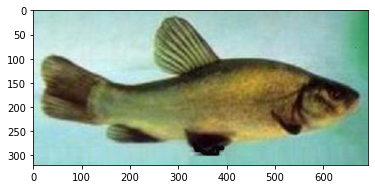

In [16]:
plt.imshow(image.load_img(path + '/n01440764/n01440764_1514.JPEG'))
plt.show()

In [0]:
IMAGE_SIZE = [200,200]
train_images = glob(path + '/*/*.JPEG')
validation_images = glob(path_val + '/*/*.JPEG')

In [0]:
# Number of classes 
classes = glob(path + '/*')

In [19]:
classes

['imagenette2-320/train/n03028079',
 'imagenette2-320/train/n03445777',
 'imagenette2-320/train/n02979186',
 'imagenette2-320/train/n02102040',
 'imagenette2-320/train/n03417042',
 'imagenette2-320/train/n03394916',
 'imagenette2-320/train/n01440764',
 'imagenette2-320/train/n03888257',
 'imagenette2-320/train/n03425413',
 'imagenette2-320/train/n03000684']

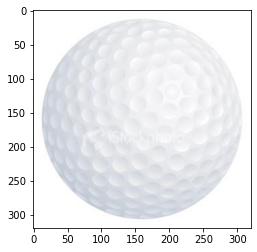

In [20]:
plt.imshow(image.load_img(np.random.choice(train_images)))
plt.show()

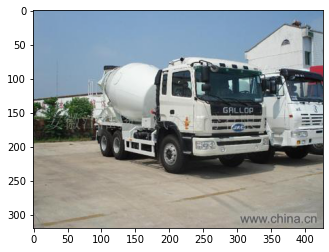

In [21]:
plt.imshow(image.load_img(np.random.choice(validation_images)))
plt.show()

In [22]:
C = 3
pretrained_model = pretrained(input_shape = IMAGE_SIZE + [C],
                              weights = 'imagenet',
                              include_top = False)


58892288/58889256 [==============================] - 1s 0us/step


In [0]:
o_layer = Flatten()(pretrained_model.output)

In [0]:
Y = len(classes)

In [0]:
model = Model(pretrained_model.input, o_layer)

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [0]:
gen_object = ImageDataGenerator(preprocessing_function = preprocess_input)

In [28]:
len(train_images)

9469

In [0]:
batch_size = 254

In [30]:
train_generator = gen_object.flow_from_directory(path, target_size=IMAGE_SIZE, batch_size=batch_size)
validation_generator = gen_object.flow_from_directory(path_val, target_size=IMAGE_SIZE, batch_size=batch_size)

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


In [34]:
input_size = [1] + IMAGE_SIZE + [3]
print(input_size)

[1, 200, 200, 3]


In [0]:
N = len(train_images)
N_val = len(validation_images)

model_out = model.predict(np.random.random(input_size))

In [42]:
shape_out = model_out.shape
print(shape_out)

(1, 18432)


In [0]:
D = shape_out[1]

In [47]:
Y

10

In [0]:
X_train = np.zeros((N, D))
y_train = np.zeros((N, Y))
X_test = np.zeros((N_val, D))
y_test = np.zeros((N_val, Y))

In [50]:
i = 0
for i_image, o_class in train_generator:
  features = model.predict(i_image)
  size_of_output = len(o_class)
  X_train[i:i+size_of_output] = features
  y_train[i:i+size_of_output] = o_class
  i +=  size_of_output
  print(i)

  if i >= N:
    break


254
508
762
1016
1270
1524
1778
2032
2286
2540
2794
3048
3302
3556
3810
4064
4318
4572
4826
5080
5334
5588
5842
6096
6350
6604
6858
7112
7366
7620
7874
8128
8382
8636
8890
9144
9215
9469


In [51]:
i = 0
for i_image, o_class in validation_generator:
  features = model.predict(i_image)
  size_of_output = len(o_class)
  X_test[i:i+size_of_output] = features
  y_test[i:i+size_of_output] = o_class
  i +=  size_of_output
  print(i)

  if i >= N_val:
    break

254
508
762
1016
1270
1524
1778
2032
2286
2540
2794
3048
3302
3556
3810
3925


In [0]:
from sklearn.preprocessing import StandardScaler 
scaler_object = StandardScaler()
X_train_scaled = scaler_object.fit_transform(X_train)
X_test_scaled = scaler_object.transform(X_test)

In [0]:
i_layer = Input(shape=(D,))
o_layer = Dense(Y, activation='softmax')(i_layer)
model = Model(i_layer, o_layer)

In [0]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam',
              metrics = ['accuracy'])

In [57]:
report = model.fit(X_train_scaled, y_train, 
                    validation_data=(X_test_scaled, y_test), 
                    epochs=10,
                    batch_size = batch_size)

Epoch 1/10
38/38 [==============================] - 1s 22ms/step - loss: 0.3633 - accuracy: 0.8954 - val_loss: 0.1874 - val_accuracy: 0.9445
Epoch 2/10
38/38 [==============================] - 1s 24ms/step - loss: 0.0130 - accuracy: 0.9976 - val_loss: 0.1727 - val_accuracy: 0.9475
Epoch 3/10
38/38 [==============================] - 1s 24ms/step - loss: 0.0027 - accuracy: 0.9999 - val_loss: 0.1724 - val_accuracy: 0.9493
Epoch 4/10
38/38 [==============================] - 1s 18ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1707 - val_accuracy: 0.9503
Epoch 5/10
38/38 [==============================] - 1s 18ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1698 - val_accuracy: 0.9506
Epoch 6/10
38/38 [==============================] - 1s 24ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1692 - val_accuracy: 0.9508
Epoch 7/10
38/38 [==============================] - 1s 25ms/step - loss: 8.6133e-04 - accuracy: 1.0000 - val_loss: 0.1687 - val_accuracy: 0.9513
Epoch 8/1

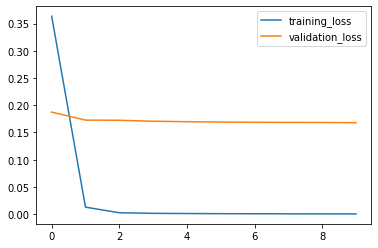

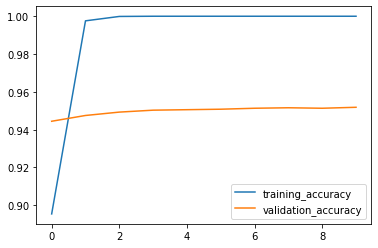

In [58]:
  plt.plot(report.history['loss'], label = 'training_loss')
  plt.plot(report.history['val_loss'], label = 'validation_loss')
  plt.legend()
  plt.show()
  plt.plot(report.history['accuracy'], label = 'training_accuracy')
  plt.plot(report.history['val_accuracy'], label = 'validation_accuracy')
  plt.legend()
  plt.show()